In [424]:
# first we import 
import pandas as pd
import numpy as np

# next, we load the csv and save to a DataFrame
df = pd.read_csv('assets/billboard.csv')

In [425]:
# Replace all * values in the dataset to Nan objects
def replace_nulls(value):
    if value == '*':
        return np.nan
    else:
        return value
df = df.applymap(replace_nulls)

In [426]:
# Replace all numbers represented as strings into floats
def replace_digits(value):
    if type(value) == 'str':
        if value.isDigit():
            return float(value)
    elif type(value) == 'int':
        return float(value)
    else:
        return value
df = df.applymap(replace_digits)

In [427]:
df.dtypes

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week           object
x3rd.week           object
x4th.week           object
x5th.week           object
x6th.week           object
x7th.week           object
x8th.week           object
x9th.week           object
x10th.week          object
x11th.week          object
x12th.week          object
x13th.week          object
x14th.week          object
x15th.week          object
x16th.week          object
x17th.week          object
x18th.week          object
x19th.week          object
x20th.week          object
x21st.week          object
x22nd.week          object
x23rd.week          object
                    ...   
x47th.week          object
x48th.week          object
x49th.week          object
x50th.week          object
x51st.week          object
x52nd.week          object
x

In [428]:
# Change the time column into track length in seconds
def to_seconds(value):
    split = value.split(',')
    return int(split[0])*60 + int(split[1])
df['time'] = df['time'].map(to_seconds)

In [429]:
# Removes columns that are all NaN values
df.dropna(axis=1, how='all', inplace=True)
df

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week
0,2000,Destiny's Child,Independent Women Part I,218,Rock,"September 23, 2000","November 18, 2000",78,63,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",258,Rock,"February 12, 2000","April 8, 2000",15,8,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,247,Rock,"October 23, 1999","January 29, 2000",71,48,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,225,Rock,"August 12, 2000","September 16, 2000",41,23,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,"August 5, 2000","October 14, 2000",57,47,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,257,Rock,"June 17, 2000","August 26, 2000",59,52,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,271,Rock'n'roll,"December 25, 1999","March 18, 2000",83,83,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,216,Latin,"April 1, 2000","June 24, 2000",63,45,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,232,Rock'n'roll,"June 24, 2000","August 12, 2000",77,66,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,265,Country,"June 5, 1999","March 4, 2000",81,54,44,...,25,26,31,32,37,42,42,45,50,NaN


[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]


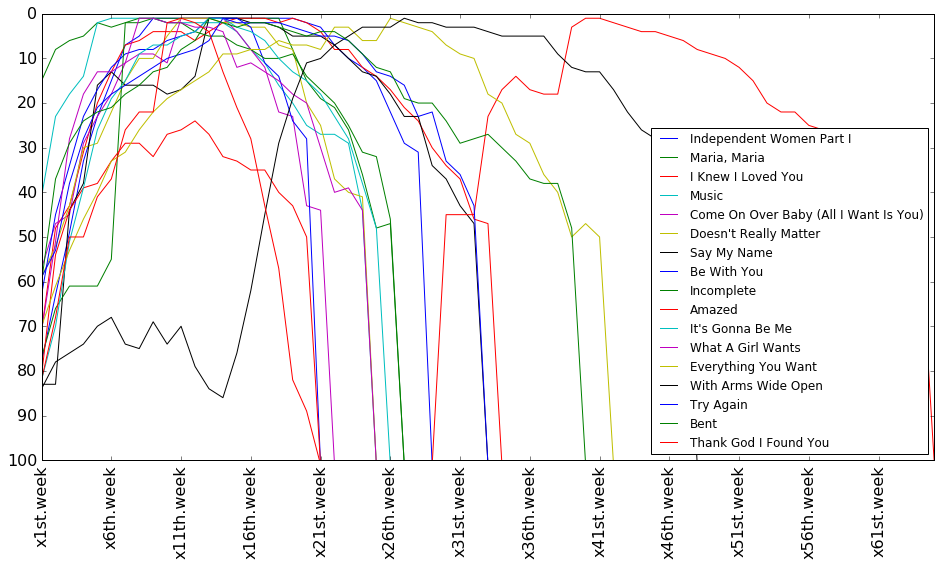

In [431]:
import matplotlib.pyplot as plt
%matplotlib inline  

ts = df.loc[:, [x for x in df.columns if 'week' in x]]
ts.index = [x for x in df['track']]
ts = ts.T.apply(pd.to_numeric)
ts.fillna(101., inplace=True)

have_hit_1 = pd.DataFrame()
for x in ts:
    if 1. in ts[x].values:
        have_hit_1[x] = ts[x]
have_hit_1

# list comprehension to get only ticks divisible by 5
xticks_to_show = [x for x in range(len(have_hit_1.index)) if x % 5 == 0]
print xticks_to_show
yticks_to_show = [x for x in range(101) if x % 10 == 0]
have_hit_1.plot(figsize=(16,8), xticks=xticks_to_show, yticks=yticks_to_show, fontsize=16, rot=90, ylim=[0,100]).invert_yaxis()


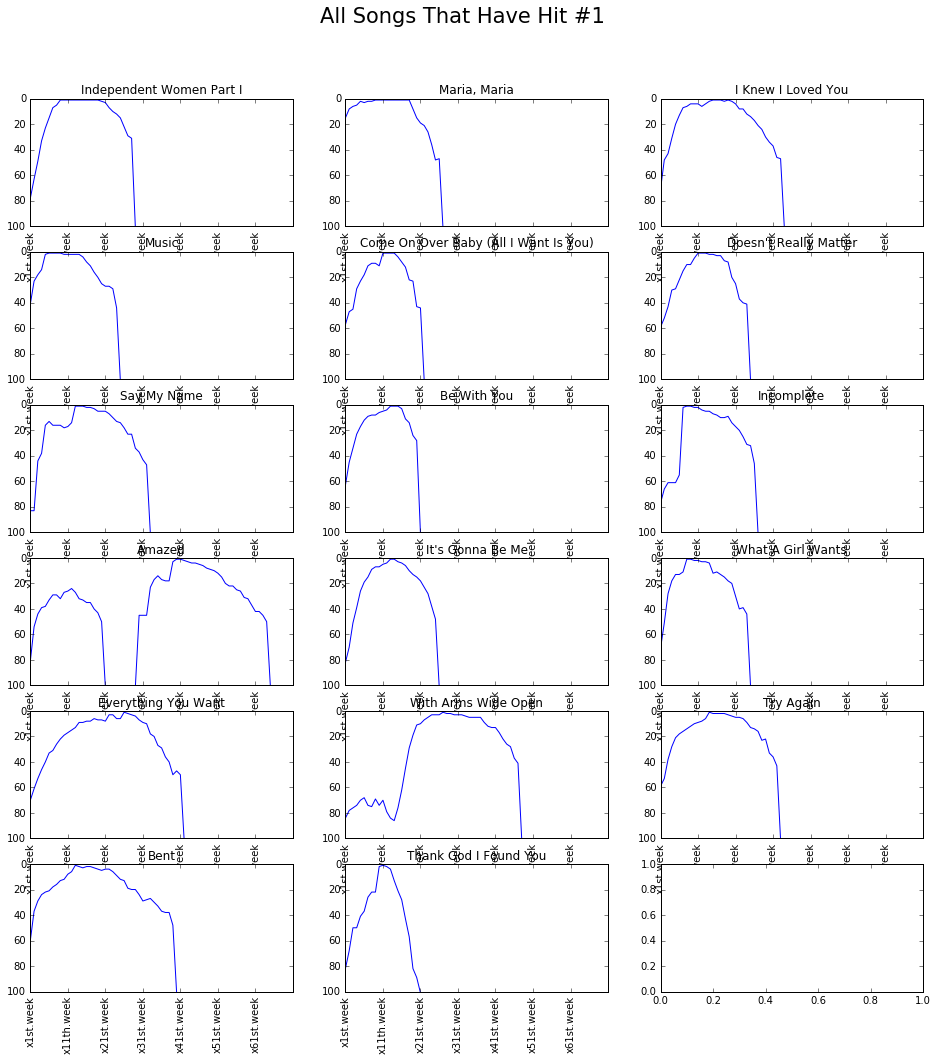

In [432]:
fig, axes = plt.subplots(6,3, figsize=(16,16))
fig.suptitle('All Songs That Have Hit #1', fontsize=21)

#list comprehension to get only ticks divisible by 3
xticks_to_show = [x for x in range(len(have_hit_1.index)) if x % 10 == 0]
yticks_to_show = [x for x in range(101) if x % 20 == 0]
column_list = have_hit_1.columns.tolist()

for idx, song in enumerate(have_hit_1):
    row = idx/axes.shape[1]
    column = idx%axes.shape[1]
    axes[row][column].plot(have_hit_1[song].values)
    axes[row][column].set_xticklabels(have_hit_1.index[xticks_to_show], rotation=90)
    axes[row][column].set_yticks(yticks_to_show)
    axes[row][column].set_yticklabels(yticks_to_show)
    axes[row][column].set_title(column_list[idx])
    axes[row][column].set_ylim([0,100])
    axes[row][column].invert_yaxis()

In [435]:
genres = df.loc[:, [x for x in df.columns if x in ['week', 'genre']]]
genres.index = [x for x in df['track']]
genres = genres.T

have_hit_1_weeks = pd.DataFrame()
have_hit_1_genres = pd.DataFrame()

for x in ts:
    if 1. in ts[x].values:
        have_hit_1_weeks[x] = ts[x]
        have_hit_1_genres[x] = genres[x]
have_hit_1_weeks
genres
df2 = pd.concat([have_hit_1_genres, have_hit_1_weeks])
df2
df2_t = df2.T
df2_t
# xticks_to_show = [x for x in range(len(have_hit_1_weeks.index)) if x % 10 == 0]
# yticks_to_show = [x for x in range(101) if x % 20 == 0]
# boxplot = have_hit_1_weeks.boxplot(vert=False, figsize=(16,8))
# boxplot.set_xticks(xticks_to_show)

,genre,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,...,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week
Independent Women Part I,Rock,78,63,49,33,23,15,7,5,1,...,101,101,101,101,101,101,101,101,101,101
"Maria, Maria",Rock,15,8,6,5,2,3,2,2,1,...,101,101,101,101,101,101,101,101,101,101
I Knew I Loved You,Rock,71,48,43,31,20,13,7,6,4,...,101,101,101,101,101,101,101,101,101,101
Music,Rock,41,23,18,14,2,1,1,1,1,...,101,101,101,101,101,101,101,101,101,101
Come On Over Baby (All I Want Is You),Rock,57,47,45,29,23,18,11,9,9,...,101,101,101,101,101,101,101,101,101,101
Doesn't Really Matter,Rock,59,52,43,30,29,22,15,10,10,...,101,101,101,101,101,101,101,101,101,101
Say My Name,Rock'n'roll,83,83,44,38,16,13,16,16,16,...,101,101,101,101,101,101,101,101,101,101
Be With You,Latin,63,45,34,23,17,12,9,8,8,...,101,101,101,101,101,101,101,101,101,101
Incomplete,Rock'n'roll,77,66,61,61,61,55,2,1,1,...,101,101,101,101,101,101,101,101,101,101
Amazed,Country,81,54,44,39,38,33,29,29,32,...,25,26,31,32,37,42,42,45,50,101


In [387]:
print 'Genres that have made it to number one with frequencies:'
df2.T['genre'].value_counts()

Genres that have made it to number one with frequencies:


Rock           8
Rock'n'roll    7
Latin          1
Country        1
Name: genre, dtype: int64

In [388]:
print "Does the number one sample represent the population sample?"
print "Why is there so much rock and rock n roll compared to latin and country?"
df['genre'].value_counts()

Does the number one sample represent the population sample?
Why is there so much rock and rock n roll compared to latin and country?


Rock           103
Country         74
Rap             58
Rock'n'roll     34
R&B             13
R & B           10
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

In [397]:
print "Percent of each genre that has made it to Number 1"
(df2.T['genre'].value_counts() * 100 / df['genre'].value_counts()).dropna()

Percent of each genre that has made it to Number 1


Country         1.351351
Latin          11.111111
Rock            7.766990
Rock'n'roll    20.588235
Name: genre, dtype: float64